## Chapter 4.1 多层感知机

* 多层感知机在输出层和输入层之间增加一个或多个全连接隐藏层，并通过激活函数转换隐藏层的输出。
* 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。

In [ ]:
# 激活函数，通过激活函数将线性转化为非线性

%matplotlib inline
import torch
from d2l import torch as d2l


In [ ]:
# ReLU - Rectified Linear Unit, 修正线性单元，一种非常简单的非线性变换

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))


In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

In [ ]:
# 挤压函数squashing function - sigmoid，将输入变换为区间（0， 1）上的输出

y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

In [ ]:
# sigmoid函数导数的图像

x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

In [ ]:
# tanh - 双曲正切函数，将输入压缩到（-1， 1）上

y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))



In [ ]:
# tanh的导数

x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh(x)', figsize=(5, 2.5))

## Chapter 4.2 MLP从零实现

* 使用英文版5.2.1章节的example

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
# Initliazed the model parameters

class MLPScratch(d2l.Classifier):
    
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))
        
        
    

In [ ]:
# Deinfe the model

def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


In [ ]:

@d2l.add_to_class(MLPScratch)

def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

In [ ]:
# Training process

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

## Chapter 4.3 MLP简洁实现

* 使用英文版5.2.2章节的代码

In [ ]:
# Define MLP

class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens), nn.ReLU(), nn.LazyLinear(num_outputs))
        
        

In [ ]:
# Training

model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## Chapter 5.4 Numerical Stability and Initialization

In [ ]:
!pip install d2l==1.0.3

In [6]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l


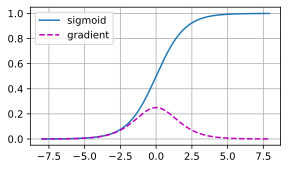

In [4]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()], 
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [5]:
M = torch.normal(0, 1, size=(4, 4))
print('a single matrix \n', M)

for i in range(100):
    M = M @ torch.normal(0, 1, size=(4, 4))

print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[ 0.4072, -0.7726, -0.4640,  2.5381],
        [ 2.1210, -0.1323,  0.2814, -1.9401],
        [ 0.4800,  0.3920, -1.3123, -1.0178],
        [-1.1294,  1.9271, -2.3784, -0.4544]])
after multiplying 100 matrices
 tensor([[-1.6648e+20,  1.6904e+21,  2.9298e+21, -1.4494e+21],
        [ 7.0384e+18, -7.1450e+19, -1.2384e+20,  6.1260e+19],
        [ 7.5927e+19, -7.7097e+20, -1.3362e+21,  6.6105e+20],
        [ 1.5445e+20, -1.5684e+21, -2.7183e+21,  1.3448e+21]])


## Chapter 5.6 Dropout

In [7]:
# Dropout Layer

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)



In [10]:
# Define the MLP with Dropout model

class DropoutMLPScratch(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2, dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = nn.LazyLinear(num_hiddens_1)
        self.lin2 = nn.LazyLinear(num_hiddens_2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((X.shape[0], -1))))
        if self.training:
            H1 = dropout_layer(H1, self.dropout_1)
        
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout_layer(H2, self.dropout_2)
            
        return self.lin3(H2)
    
    

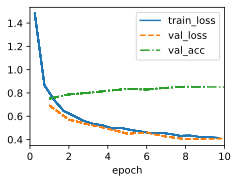

In [11]:
# Let's training

hparams = {'num_outputs': 10, 'num_hiddens_1':256, 'num_hiddens_2':256, 'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}

model = DropoutMLPScratch(**hparams)

data = d2l.FashionMNIST(batch_size=256)

trainer = d2l.Trainer(max_epochs=10)

trainer.fit(model, data)

In [12]:
# Concise implementation for dropout MLP

class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2, dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), 
            nn.LazyLinear(num_hiddens_1), nn.ReLU(), nn.Dropout(dropout_1), 
            nn.LazyLinear(num_hiddens_2), nn.ReLU(), nn.Dropout(dropout_2),
            nn.LazyLinear(num_outputs)
        )
        


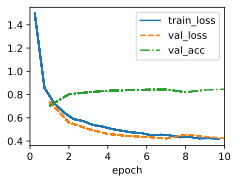

In [13]:
model = DropoutMLP(**hparams)

trainer.fit(model, data)

## Chapter 4.10 实战Kaggle：预测房价

In [15]:
import hashlib
import os
import tarfile
import zipfile
import requests

DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com'

In [26]:
# Download data

def download(name, cached_dir=os.path.join('..', 'data')):
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    
    url, sha1_hash = DATA_HUB[name]
    
    os.makedirs(cached_dir, exist_ok=True)
    fname = os.path.join(cached_dir, url.split('/')[-1])
    
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname
        
    print(f'正在从{url}下载{fname}...')
    
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
        
    return fname

    

In [18]:
def download_extract(name, folder=None):
    
    fname = download(name)
    
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有Zip和tar文件可以被解压缩'
        
    fp.extractall(base_dir)
    
    return os.path.join(base_dir, folder) if folder else data_dir


In [19]:
def download_all():
    for name in DATA_HUB:
        download(name)

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l


In [22]:
DATA_HUB['kaggle_house_train'] = (  #@save
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (  #@save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [27]:
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

正在从http://d2l-data.s3-accelerate.amazonaws.comkaggle_house_pred_train.csv下载../data/d2l-data.s3-accelerate.amazonaws.comkaggle_house_pred_train.csv...


ConnectionError: HTTPConnectionPool(host='d2l-data.s3-accelerate.amazonaws.comkaggle_house_pred_train.csv', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f4f735cfb20>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [30]:
class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'
            ))
            
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'
            ))
            

In [31]:
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape)
print(data.raw_val.shape)

(1460, 81)
(1459, 80)


In [32]:
print(data.raw_train.iloc[:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [34]:
@d2l.add_to_class(KaggleHouse)

def preprocess(self):
    
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])
        )
    )
    
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes!='object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std())
    )
    
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    
    # Replace discrete features by one-hot encoding
    features = pd.get_dummies(features, dummy_na=True)
    
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()
    
    

In [35]:
data.preprocess()
data.train.shape

(1460, 331)

In [36]:
@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: torch.tensor(x.values.astype(float),
                                       dtype=torch.float32)
    
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),
              torch.log(get_tensor(data[label])).reshape((-1, 1)))
    
    return self.get_tensorloader(tensors, train)

In [40]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx), data.train.loc[idx]))
        
    return rets

In [43]:
def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        
        if i != 0:
            model.board.display = False
        
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        
        models.append(model)
        
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/t

average validation log mse = 0.1810021811723709


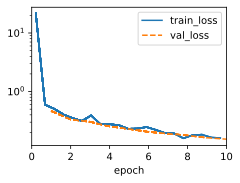

In [44]:
trainer = d2l.Trainer(max_epochs=10)
models = k_fold(trainer, data, k=5, lr=0.01)

In [45]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32)) for model in models]

# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)

submission = pd.DataFrame({
    'Id':data.raw_val.Id,
    'SalePrice': ensemble_preds.detach().numpy()})

submission.to_csv('submission.csv', index=False)
